## **Configuración del ambiente**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [ ]:
import requests
from io import StringIO

## **2.1. Cargando las bases de datos**

In [ ]:
# Cargar datos de COVID-19
covid_data_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
covid_response = requests.get(covid_data_url)
df_covid = pd.read_csv(StringIO(covid_response.text))

# Cargar datos de población
population_data_url = ('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx')
df_population = pd.read_excel(population_data_url, sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [ ]:
df_covid.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
50875,2023-12-24,ZW,Zimbabwe,AFRO,23.0,266048,1.0,5731
50876,2023-12-31,ZW,Zimbabwe,AFRO,23.0,266071,NaN,5731
50877,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266117,3.0,5734
50878,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266202,3.0,5737
50879,2024-01-21,ZW,Zimbabwe,AFRO,55.0,266257,NaN,5737


In [ ]:
df_population.tail()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
20305,20306,Estimates,Samoa,NaN,882,WSM,WS,882.0,Country/Area,957,...,199.759,133.625,68.304,81.648,53.949,148.134,178.682,114.303,-2.469,-11.584
20377,20378,Estimates,Tokelau,35,772,TKL,TK,772.0,Country/Area,957,...,141.052,142.411,63.07,58.218,68.146,133.511,132.832,134.951,0.113,66.637
20449,20450,Estimates,Tonga,NaN,776,TON,TO,776.0,Country/Area,957,...,245.689,169.545,97.746,114.797,81.702,194.945,232.709,156.813,-1.898,-17.923
20521,20522,Estimates,Tuvalu,NaN,798,TUV,TV,798.0,Country/Area,957,...,404.852,239.933,174.791,218.086,122.296,308.753,384.691,217.301,-0.057,-5.188
20593,20594,Estimates,Wallis and Futuna Islands,2,876,WLF,WF,876.0,Country/Area,957,...,77.781,80.136,24.304,22.291,25.981,66.639,69.324,64.496,-0.171,-14.489


In [ ]:
df_covid.shape

(50880, 8)

In [ ]:
df_population.shape

(286, 65)

In [ ]:
df_covid.isnull().sum()

Date_reported            0
Country_code          1484
Country               1272
WHO_region            5088
New_cases            14258
Cumulative_cases         0
New_deaths           26664
Cumulative_deaths        0
dtype: int64

## **2.2. EDA Base Covid World Health Organization**

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
df_original = pd.DataFrame(df_covid)

# Hacer una copia del DataFrame
df_covid_copia = df_original.copy()

In [ ]:
# Eliminar registros con nulos en la columna 'Country_code'
df_covid_copia.dropna(subset=['Country_code'], inplace=True)

In [ ]:
df_covid_copia

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,AFRO,23.0,266048,1.0,5731
50876,2023-12-31,ZW,Zimbabwe,AFRO,23.0,266071,NaN,5731
50877,2024-01-07,ZW,Zimbabwe,AFRO,46.0,266117,3.0,5734
50878,2024-01-14,ZW,Zimbabwe,AFRO,85.0,266202,3.0,5737


In [ ]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   WHO_region         45580 non-null  object 
 4   New_cases          36436 non-null  float64
 5   Cumulative_cases   49396 non-null  int64  
 6   New_deaths         24088 non-null  float64
 7   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
# Mantener en el dataframe sólo las siguientes columnas:
columnas_deseadas = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid_copia = df_covid_copia.loc[:, columnas_deseadas]

# Mostrar el DataFrame resultante
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0
...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23.0,266048,1.0,5731
50876,2023-12-31,ZW,Zimbabwe,23.0,266071,NaN,5731
50877,2024-01-07,ZW,Zimbabwe,46.0,266117,3.0,5734
50878,2024-01-14,ZW,Zimbabwe,85.0,266202,3.0,5737


In [ ]:
# Reemplazar todos los valores nulos con cero
df_covid_copia.fillna(0, inplace=True)

# Mostrar el DataFrame resultante
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0
...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23.0,266048,1.0,5731
50876,2023-12-31,ZW,Zimbabwe,23.0,266071,0.0,5731
50877,2024-01-07,ZW,Zimbabwe,46.0,266117,3.0,5734
50878,2024-01-14,ZW,Zimbabwe,85.0,266202,3.0,5737


In [ ]:
df_covid_copia.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [ ]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [ ]:
# Convertir la columna 'Date_reported' a datetime
df_covid_copia['Date_reported'] = pd.to_datetime(df_covid_copia['Date_reported'])

In [ ]:
# Cambiar el formato a int64
df_covid_copia['New_cases'] = df_covid_copia['New_cases'].astype('int64')
df_covid_copia['New_deaths'] = df_covid_copia['New_deaths'].astype('int64')

# Imprimir los tipos del DataFrame
print(df_covid_copia.dtypes)

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object


In [ ]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
df_covid_copia.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.939600e+04,4.939600e+04,49396.000000,4.939600e+04
mean,1.567324e+04,1.643477e+06,142.040530,1.928293e+04
std,2.408294e+05,7.274286e+06,875.025827,7.909933e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,0.000000e+00,3.846750e+03,0.000000,2.900000e+01
50%,1.020000e+02,4.283250e+04,0.000000,4.980000e+02
75%,1.999250e+03,4.998840e+05,20.000000,6.630250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06


In [ ]:
# Crear la columna 'lethality_rate'
df_covid_copia['lethality_rate'] = (df_covid_copia['Cumulative_deaths'] / df_covid_copia['Cumulative_cases'])* 100

# Imprimir el DataFrame resultante
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,NaN
1,2020-01-12,AF,Afghanistan,0,0,0,0,NaN
2,2020-01-19,AF,Afghanistan,0,0,0,0,NaN
3,2020-01-26,AF,Afghanistan,0,0,0,0,NaN
4,2020-02-02,AF,Afghanistan,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.154123
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.153936
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.154691
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.155130


In [ ]:
# Crear la columna 'lethality_rate' con manejo de divisiones por cero
df_covid_copia['lethality_rate'] = np.where(
    df_covid_copia['Cumulative_cases'] == 0,
    0,  # En caso de que Cumulative_cases sea cero, asignar cero a la tasa de letalidad
    (df_covid_copia['Cumulative_deaths'] / df_covid_copia['Cumulative_cases']) * 100
)

# Imprimir el DataFrame resultante
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.000000
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.000000
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.000000
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.000000
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.154123
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.153936
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.154691
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.155130


In [ ]:
# Contar los valores NaN en 'Cumulative_cases'
nan_count = df_covid_copia['Cumulative_cases'].isna().sum()

# Imprimir el conteo de NaN
print(f'Número de NaN en "Cumulative_cases": {nan_count}')


Número de NaN en "Cumulative_cases": 0


In [ ]:
# Contar los valores iguales a 0 en 'Cumulative_cases'
zero_count = (df_covid_copia['Cumulative_cases'] == 0).sum()

# Imprimir el conteo de ceros
print(f'Número de valores igual a 0 en "Cumulative_cases": {zero_count}')


Número de valores igual a 0 en "Cumulative_cases": 4092


In [ ]:
df_covid_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
 7   lethality_rate     49396 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.4+ MB


New_cases               Axes(0.125,0.11;0.133621x0.77)
Cumulative_cases     Axes(0.285345,0.11;0.133621x0.77)
New_deaths            Axes(0.44569,0.11;0.133621x0.77)
Cumulative_deaths    Axes(0.606034,0.11;0.133621x0.77)
lethality_rate       Axes(0.766379,0.11;0.133621x0.77)
dtype: object

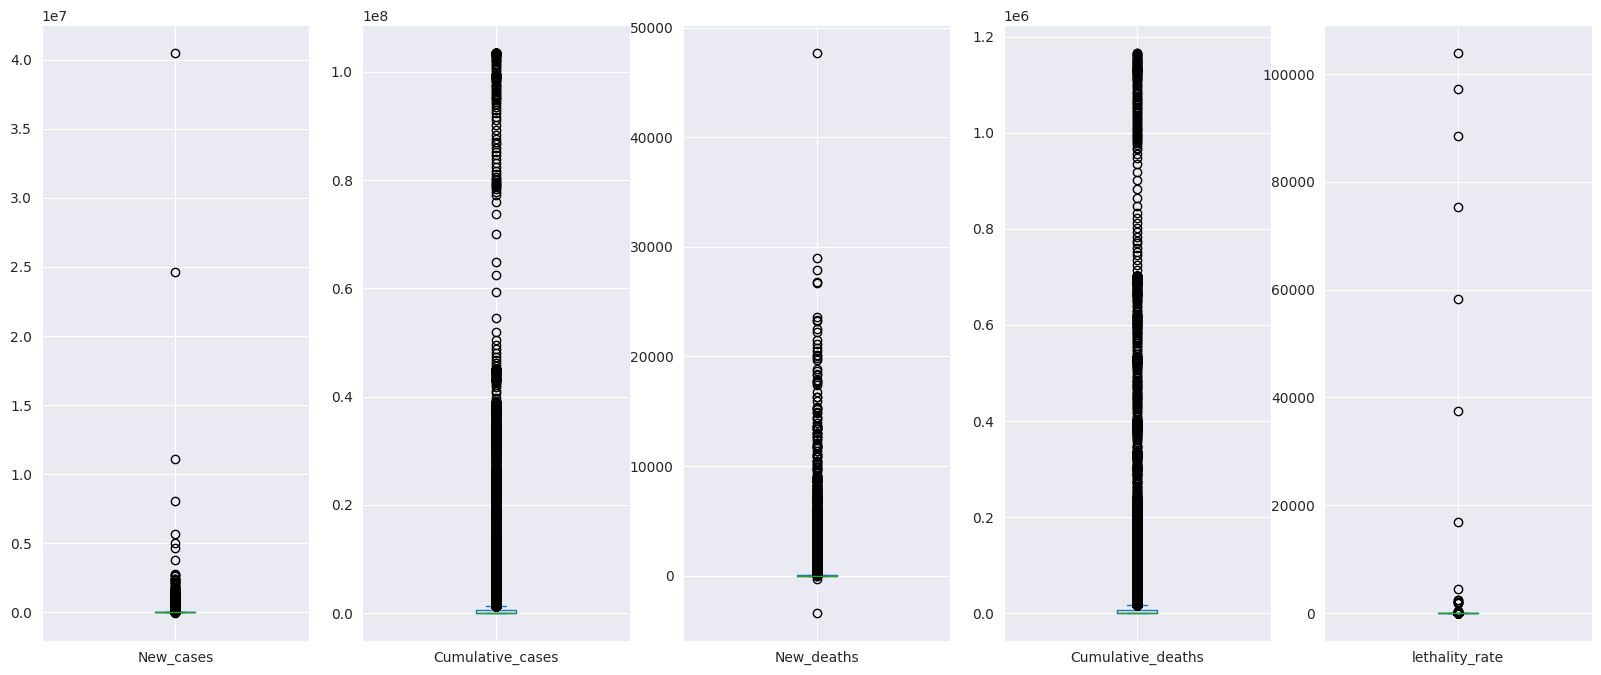

In [ ]:
df_covid_copia.plot(kind = 'box' , figsize =(20,8),subplots =True)

In [ ]:
# Calcular los cuantiles
lower_quantile = df_covid_copia['lethality_rate'].quantile(0)
upper_quantile = df_covid_copia['lethality_rate'].quantile(0.99)

# Filtrar los registros que están dentro del rango de cuantiles
df_covid_copia = df_covid_copia[(df_covid_copia['lethality_rate'] >= lower_quantile) & (df_covid_copia['lethality_rate'] <= upper_quantile)]

# Imprimir el DataFrame resultante
df_covid_copia

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.000000
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.000000
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.000000
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.000000
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.154123
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.153936
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.154691
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.155130


In [ ]:
# Finalmente reiniciaremos el índice del dataframe final df_covid_limpio
df_covid_limpio = df_covid_copia.reset_index(drop=True).copy()

In [ ]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [ ]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.890200e+04,4.890200e+04,48902.000000,4.890200e+04,48902.000000
mean,1.578888e+04,1.659511e+06,137.952804,1.938534e+04,1.452227
std,2.420378e+05,7.309169e+06,867.201944,7.947268e+04,1.623779
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,3.904000e+03,0.000000,2.800000e+01,0.326011
50%,1.030000e+02,4.378500e+04,0.000000,4.710000e+02,1.029184
75%,2.005000e+03,5.070060e+05,20.000000,6.635500e+03,2.004269
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.156031


## **2.3 EDA Base Population United Nations**

In [ ]:
#Mantener sólo las columnas seleccionadas
df_population_limpio = df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']]

In [ ]:
df_population_limpio.head()

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013


In [ ]:
df_population_limpio.shape

(286, 6)

In [ ]:
df_population_limpio.describe()

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
count,236,286.000,286.000,286.000,286.000,286.000
unique,236,284.000,284.000,284.000,284.000,281.000
top,BI,646846.757,318988.766,327857.991,31.918,71.822
freq,1,2.000,2.000,2.000,2.000,2.000


In [ ]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   ISO2 Alpha-code                                           236 non-null    object
 1   Total Population, as of 1 July (thousands)                286 non-null    object
 2   Male Population, as of 1 July (thousands)                 286 non-null    object
 3   Female Population, as of 1 July (thousands)               286 non-null    object
 4   Population Density, as of 1 July (persons per square km)  286 non-null    object
 5   Life Expectancy at Birth, both sexes (years)              286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [ ]:
#Renombrar las columnas
df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
}, inplace=True)

In [ ]:
df_population_limpio.describe()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,236,286.000,286.000,286.000,286.000,286.000
unique,236,284.000,284.000,284.000,284.000,281.000
top,BI,646846.757,318988.766,327857.991,31.918,71.822
freq,1,2.000,2.000,2.000,2.000,2.000


In [ ]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013


In [ ]:
#Contar registros nulos
df_population_limpio.isna().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [ ]:
#Eliminar todos los registros nulos
df_population_limpio.dropna(inplace=True)

In [ ]:
df_population_limpio.describe()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,236,236.000,236.000,236.00,236.000,236.000
unique,236,236.000,236.000,236.00,236.000,234.000
top,BI,11874.838,5894.278,5980.56,457.605,71.822
freq,1,1.000,1.000,1.00,1.000,2.000


In [ ]:
df_population_limpio

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


In [ ]:
#Contar registros nulos
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
#Cambiar formato de columnas a int64
columnas = ['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']
for c in columnas:
  df_population_limpio[c] = pd.to_numeric(df_population_limpio[c], errors='coerce')

In [ ]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.360000e+02,235.000000,235.000000,236.000000,235.000000
mean,3.289197e+04,16617.983932,16413.947400,462.186733,73.489502
std,1.342185e+05,68891.302721,65609.328688,2217.943147,7.360874
min,5.280000e-01,0.879000,0.874000,0.136000,52.910000
25%,3.938875e+02,194.840500,210.997000,38.840000,68.524500
50%,5.401102e+03,2738.222000,2767.844000,95.488500,75.057000
75%,2.066348e+04,10409.421500,10350.110500,240.957750,79.100500
max,1.421864e+06,726781.914000,695082.117000,24855.034000,86.542000


In [ ]:
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       1
Female_Population     1
Population_Density    0
Life_Expectancy       1
dtype: int64

In [ ]:
#Multiplicar por 1000 columnas
columnas = ['Total_Population','Male_Population','Female_Population']
for c in columnas:
  df_population_limpio[c] = df_population_limpio[c]*1000

In [ ]:
#Volver a eliminar registros nulos
df_population_limpio.dropna(inplace=True)

In [ ]:
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
#Reiniciar índices
df_population_limpio = df_population_limpio.reset_index(drop=True)

In [ ]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874838.0,5894278.0,5980560.0,457.605,62.351
1,KM,790986.0,397126.0,393860.0,425.033,64.068
2,DJ,1073994.0,533626.0,540367.0,46.333,63.085
3,ER,3498818.0,1724860.0,1773958.0,28.881,67.300
4,ET,114120594.0,57375433.0,56745161.0,114.121,65.838


In [ ]:
df_population_limpio.tail()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
230,WS,211905.0,108147.0,103759.0,74.878,72.157
231,TK,1752.0,879.0,874.0,146.000,75.076
232,TO,104951.0,51994.0,52956.0,161.462,70.871
233,TV,10956.0,5654.0,5301.0,365.200,64.278
234,WF,11714.0,5648.0,6066.0,83.671,79.617


Total_Population         Axes(0.125,0.11;0.133621x0.77)
Male_Population       Axes(0.285345,0.11;0.133621x0.77)
Female_Population      Axes(0.44569,0.11;0.133621x0.77)
Population_Density    Axes(0.606034,0.11;0.133621x0.77)
Life_Expectancy       Axes(0.766379,0.11;0.133621x0.77)
dtype: object

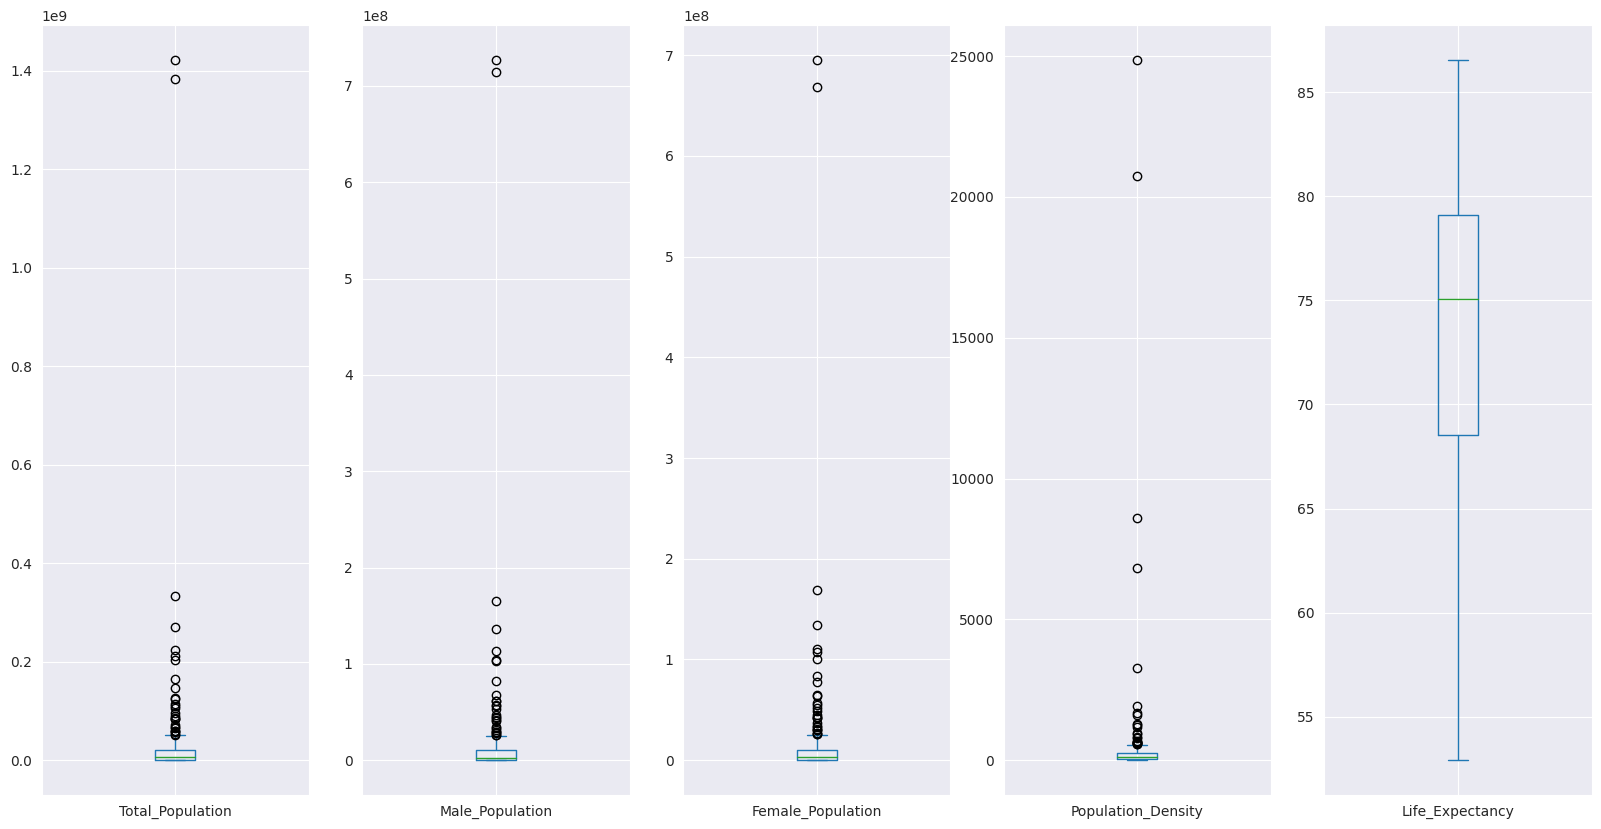

In [ ]:
df_population_limpio.plot(kind = 'box' , figsize =(20,10),subplots =True)

In [ ]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.350000e+02,2.350000e+02,2.350000e+02,235.000000,235.000000
mean,3.303193e+07,1.661798e+07,1.641395e+07,459.047102,73.489502
std,1.344877e+08,6.889130e+07,6.560933e+07,2222.151677,7.360874
min,1.752000e+03,8.790000e+02,8.740000e+02,0.136000,52.910000
25%,4.000210e+05,1.948405e+05,2.109970e+05,38.731000,68.524500
50%,5.453924e+06,2.738222e+06,2.767844e+06,95.237000,75.057000
75%,2.075953e+07,1.040942e+07,1.035011e+07,239.942000,79.100500
max,1.421864e+09,7.267819e+08,6.950821e+08,24855.034000,86.542000


## **PREGUNTAS**

### ***Pregunta 1***

**¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?**

**Worldwide Cases Distribution**

In [ ]:
import pandas as pd

# Agrupar por país y obtener el máximo valor de la columna Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado
total_por_pais


Country
United States of America                 103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64

In [ ]:
# Agrupar por país y obtener el máximo valor de la columna Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Seleccionar los 10 primeros países
top_10_paises = total_por_pais.head(10)

# Mostrar el resultado
top_10_paises


Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64

In [ ]:
# Obtener los países que no están en el top 10
otros_paises = total_por_pais.drop(top_10_paises.index)

# Sumar los valores restantes
otros = otros_paises.sum()

# Mostrar el resultado
print("Total de otros países:", otros)


Total de otros países: 291519855


In [ ]:
# Reemplazar nombres de países
df_covid_limpio['Country'] = df_covid_limpio['Country'].replace({'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})

# Recalcular la distribución mundial
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_10_paises = total_por_pais.nlargest(10)
otros = total_por_pais.drop(top_10_paises.index).sum()
top_10_paises['Otros'] = otros

# Mostrar el resultado
top_10_paises


Country
USA                  103436829
China                 99326423
India                 45023751
France                38997490
Germany               38437756
Brazil                37519960
Republic of Korea     34571873
Japan                 33803572
Italy                 26693706
United Kingdom        24885790
Otros                291519855
Name: Cumulative_cases, dtype: int64

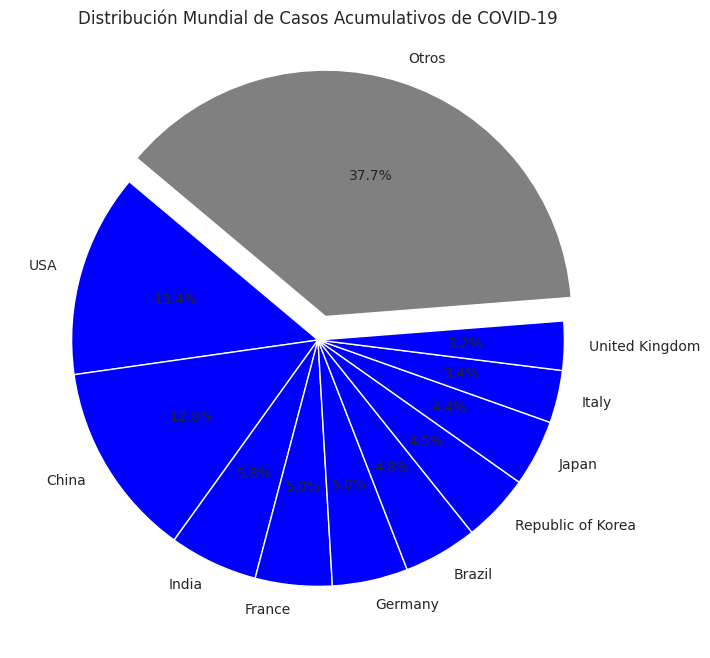

In [ ]:

import matplotlib.pyplot as plt

# Preparar datos para el gráfico circular
sizes1 = list(top_10_paises.values)
labels1 = list(top_10_paises.index)
colors = ['blue' if country in top_10_paises.index else 'gray' for country in total_por_pais.index]

# Ajustar el valor de explode para destacar 'Otros'
explode = [0.1 if country == 'Otros' else 0 for country in top_10_paises.index]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribución Mundial de Casos Acumulativos de COVID-19')

# Mostrar el gráfico
plt.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Calcular porcentajes
total_por_pais_percentage1 = total_por_pais / total_por_pais.sum() * 100
otros_percentage1 = otros / total_por_pais.sum() * 100

# Crear un DataFrame para los datos
data1 = {'Country': total_por_pais.index, 'Cumulative_cases': total_por_pais.values, 'Percentage': total_por_pais_percentage1.values}
df_nuevo = pd.DataFrame(data1)

# Agregar 'Otros' al DataFrame
df_top_10_otros = df_nuevo.nlargest(10, 'Cumulative_cases')
df_top_10_otros.loc[10] = ['Otros', otros, otros_percentage1]

# Crear el gráfico circular con Plotly Express
fig1 = px.pie(df_top_10_otros, names='Country', values='Cumulative_cases',
             hole=0.3, color_discrete_sequence=px.colors.qualitative.Set1,
             hover_data=['Cumulative_cases'])

# Personaliza el diseño del gráfico
fig1.update_layout(
    title_text='Worldwide Cases Distribution COVID-19',
    title_font_size=16,
    title_font_family="Arial",
    xaxis_title='Importancia',
    yaxis_title='Característica',
    yaxis=dict(categoryorder='total ascending'),
    height=400,  # Ajusta el alto de la gráfica
    width=800    # Ajusta el ancho de la gráfica
)

# Guardar el gráfico como una imagen
fig1.write_image("Worldwide_Cases_Distribution.png")

# Mostrar el gráfico
fig1.show()

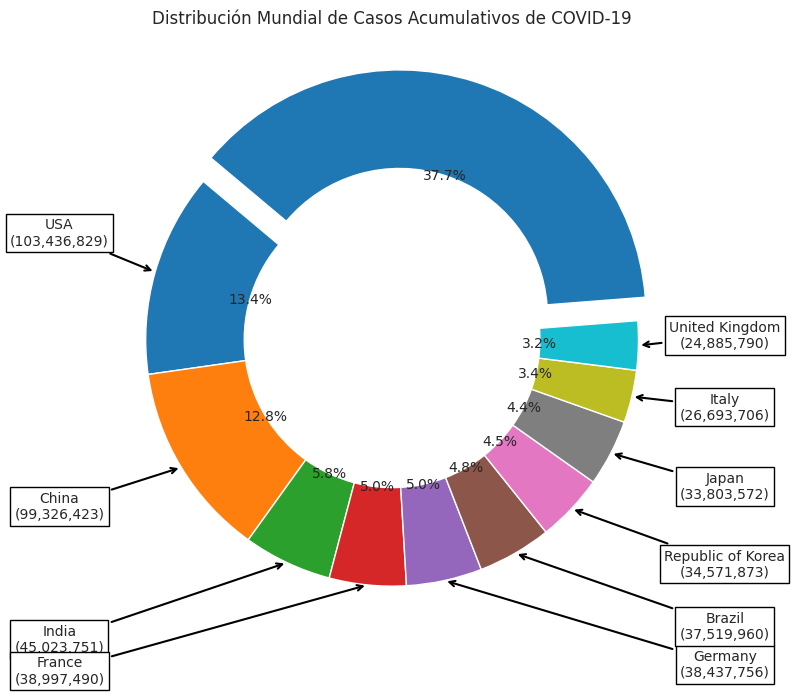

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Worldwide Distribution
total_por_pais1 = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_10_paises1 = total_por_pais.nlargest(10)

# Crear una nueva serie incluyendo 'Otros'
otros = total_por_pais.drop(top_10_paises1.index)
top_10_paises_con_otros = top_10_paises1.append(pd.Series({'Otros': otros.sum()}))

# Preparar datos para el gráfico circular
sizes = list(top_10_paises_con_otros.values)
labels = list(top_10_paises_con_otros.index)

# Ajustar el valor de explode para destacar 'Otros'
explode = [0.1 if label == 'Otros' else 0 for label in top_10_paises_con_otros.index]

# Crear etiquetas que incluyan el nombre del país y la cantidad
formatted_labels = [f'{label}\n({size:,})' for label, size in zip(labels, sizes)]

# Crear el gráfico circular con matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140, explode=explode,
                                  wedgeprops=dict(width=0.4))

# Agregar etiquetas y flechas que señalan cada parte
for i, (p, label) in enumerate(zip(wedges, formatted_labels)):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    bbox_props = dict(boxstyle="square,pad=0.3", edgecolor='black', facecolor='white')

    # Omitir la etiqueta 'Otros'
    if 'Otros' not in label:
        ax.annotate(label, xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                    arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
                    bbox=bbox_props, ha='center')

plt.title('Distribución Mundial de Casos Acumulativos de COVID-19')

# Mostrar el gráfico
plt.show()

**Case Progression by Country**

In [ ]:
import pandas as pd

# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado
total_por_pais

Country
USA                                      103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64

In [ ]:
# Seleccionar los 5 primeros países y guardar el resultado en top_5_paises
top_5_paises = total_por_pais.head(5)

# Mostrar el resultado
top_5_paises


Country
USA        103436829
China       99326423
India       45023751
France      38997490
Germany     38437756
Name: Cumulative_cases, dtype: int64

In [ ]:
# Reiniciar el índice y almacenar en df_covid_limpio_reset
df_covid_limpio_reset = df_covid_limpio.reset_index(drop=True)

# Mostrar el DataFrame resultante
df_covid_limpio_reset.head()


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [ ]:
# Extraer los nombres de los países de top_5_paises

# top_5_paises contiene un objeto Series con el nombre del país como índice
# y el número de casos acumulativos como valor.
top_5_paises_nombres = top_5_paises.index

# Filtrar el DataFrame para mantener solo los registros en top_5_paises
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises_nombres)]

# Mostrar el DataFrame resultante
df_top_5.head(10)


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
8852,2020-01-05,CN,China,1,1,0,0,0.000000
8853,2020-01-12,CN,China,44,45,1,1,2.222222
8854,2020-01-19,CN,China,80,125,2,3,2.400000
8855,2020-01-26,CN,China,1860,1985,53,56,2.821159
8856,2020-02-02,CN,China,12426,14411,305,361,2.505031
8857,2020-02-09,CN,China,22840,37251,544,905,2.429465
8858,2020-02-16,CN,China,31333,68584,862,1767,2.576403
8859,2020-02-23,CN,China,8458,77042,679,2446,3.174892
8860,2020-03-01,CN,China,2926,79968,427,2873,3.592687
8861,2020-03-08,CN,China,891,80859,228,3101,3.835071


In [ ]:
# Case Progression by Country
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_5_paises = total_por_pais.nlargest(5)
df_covid_limpio_reset = df_covid_limpio.reset_index()
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0
USA,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


In [ ]:
# DataFrame llamado casos_acumulativos_usa que contiene solo las columnas 'Date_reported'
# y 'Cumulative_cases' para Estados Unidos. El método reset_index(drop=True) se utiliza
# para restablecer el índice del nuevo DataFrame y eliminar el índice anterior.
casos_acumulativos_usa = df_top_5[df_top_5['Country'] == 'USA'][['Date_reported', 'Cumulative_cases']].reset_index(drop=True)
casos_acumulativos_usa


,Date_reported,Cumulative_cases
0,2020-01-05,0
1,2020-01-12,0
2,2020-01-19,0
3,2020-01-26,7
4,2020-02-02,9
...,...,...
207,2023-12-24,103436829
208,2023-12-31,103436829
209,2024-01-07,103436829
210,2024-01-14,103436829


In [ ]:
# Se crea una nueva columna llamada "Dias" que representa la diferencia en días desde la
# primera fecha en Date_reported. El + 1 se agrega para que el primer día sea 1 en lugar de 0.
casos_acumulativos_usa['Dias'] = (casos_acumulativos_usa['Date_reported'] - casos_acumulativos_usa['Date_reported'].min()).dt.days + 1
casos_acumulativos_usa

,Date_reported,Cumulative_cases,Dias
0,2020-01-05,0,1
1,2020-01-12,0,8
2,2020-01-19,0,15
3,2020-01-26,7,22
4,2020-02-02,9,29
...,...,...,...
207,2023-12-24,103436829,1450
208,2023-12-31,103436829,1457
209,2024-01-07,103436829,1464
210,2024-01-14,103436829,1471


In [ ]:
# Para detectar en qué día comienza a subir la columna Cumulative_cases
indice_inicio_subida = casos_acumulativos_usa[casos_acumulativos_usa['Cumulative_cases'] > 0].index[0]
dia_inicio_subida = casos_acumulativos_usa.loc[indice_inicio_subida, 'Dias']
dia_inicio_subida

22

In [ ]:
# Esto te dará el valor en la columna Dias correspondiente al día en que se alcanzó el máximo en Cumulative_cases.
dia_punto_mas_alto = casos_acumulativos_usa['Dias'].iloc[casos_acumulativos_usa['Cumulative_cases'].idxmax()]
dia_punto_mas_alto

1226

In [ ]:
# índice correspondiente al día en que se alcanzó el máximo en Cumulative_cases.
indice_punto_mas_alto = casos_acumulativos_usa['Cumulative_cases'].idxmax()
indice_punto_mas_alto

175

In [ ]:
# Corroborar el rango para ver hasta donde ya no hubo Cumulative_cases.
observaciones = casos_acumulativos_usa.iloc[170:181, :]
observaciones

,Date_reported,Cumulative_cases,Dias
170,2023-04-09,102977396,1191
171,2023-04-16,103081453,1198
172,2023-04-23,103179920,1205
173,2023-04-30,103266404,1212
174,2023-05-07,103343569,1219
175,2023-05-14,103436829,1226
176,2023-05-21,103436829,1233
177,2023-05-28,103436829,1240
178,2023-06-04,103436829,1247
179,2023-06-11,103436829,1254


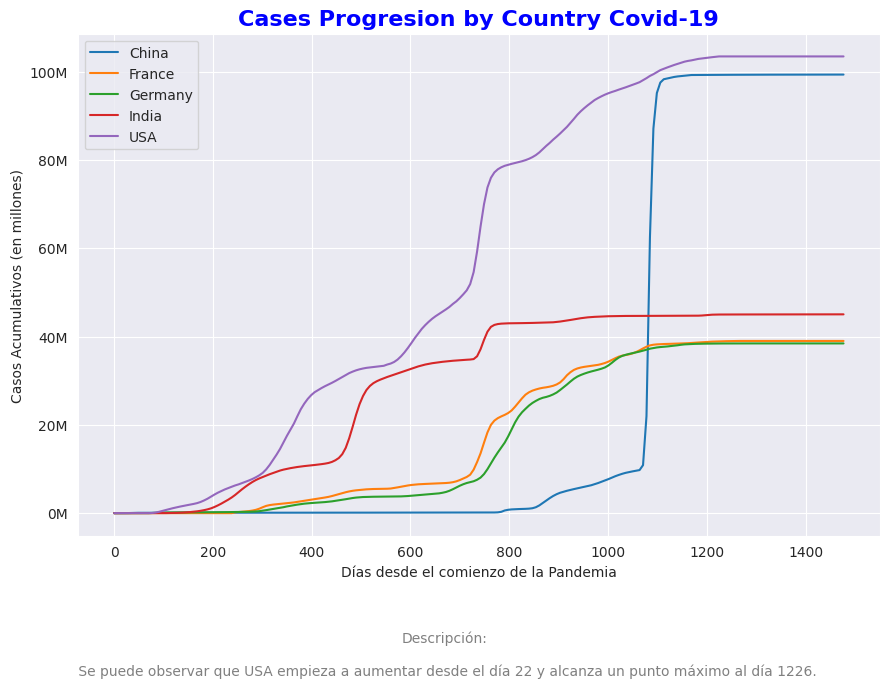

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcula la diferencia en días desde la fecha mínima
df_top_5['Days_since_start'] = (df_top_5['Date_reported'] - df_top_5['Date_reported'].min()).dt.days

# Pivotear el DataFrame
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Days_since_start', values='Cumulative_cases').fillna(0)

# Convertir valores a millones
total_acumulado_top_5 = total_acumulado_top_5 / 1_000_000  # Dividir por 1 millón

# Obtener colores para cada país
colores = plt.cm.tab10(range(len(total_acumulado_top_5)))

pais_anotar = "USA"


# contiene solo las columnas 'Date_reported' y 'Cumulative_cases' para Estados Unidos del DataFrame df_top_5
casos_acumulativos_usa = df_top_5[df_top_5['Country'] == pais_anotar][['Date_reported', 'Cumulative_cases']].reset_index(drop=True)
# Se crea una nueva columna llamada "Dias" que representa la diferencia en días desde la primera fecha en Date_reported.
casos_acumulativos_usa['Dias'] = (casos_acumulativos_usa['Date_reported'] - casos_acumulativos_usa['Date_reported'].min()).dt.days + 1
# Para detectar en qué día comienza a subir
indice_inicio_subida = casos_acumulativos_usa[casos_acumulativos_usa['Cumulative_cases'] > 0].index[0]
dia_inicio_subida = casos_acumulativos_usa.loc[indice_inicio_subida, 'Dias']
# Encontrar el dia punto mas alto
dia_punto_mas_alto = casos_acumulativos_usa['Dias'].iloc[casos_acumulativos_usa['Cumulative_cases'].idxmax()]


# Crear subplot
fig, ax = plt.subplots(figsize=(9, 6))

# Iterar sobre cada país y trazar la curva de casos acumulativos
for i, pais in enumerate(total_acumulado_top_5.index):
    ax.plot(total_acumulado_top_5.columns, total_acumulado_top_5.loc[pais], label=pais, color=colores[i])

# Personalizar el gráfico
ax.set_title('Cases Progresion by Country Covid-19', fontsize=16, fontweight='bold', color='blue', ha='center')
ax.set_xlabel('Días desde el comienzo de la Pandemia')
ax.set_ylabel('Casos Acumulativos (en millones)')
ax.legend()

# Formatear el eje y para agregar "M"
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Agregar descripción en la parte inferior con información adicional
desc_text = f"Descripción:\n\n Se puede observar que {pais_anotar} empieza a aumentar desde el día {dia_inicio_subida} y alcanza un punto máximo al día {dia_punto_mas_alto}."
fig.text(0.5, -0.1, desc_text, ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [ ]:
import plotly.express as px

# Crear el gráfico circular con Plotly Express
fig = px.line(total_acumulado_top_5.T, labels={'value': 'Casos Acumulativos (en millones)', 'index': 'Días desde el comienzo de la Pandemia'},
              title='Progresión de Casos Acumulativos por País', template='plotly_dark')

# Marcar el inicio de la subida y el punto más alto para el país de interés
fig.add_shape(type='line', x0=dia_inicio_subida, x1=dia_inicio_subida, y0=0, y1=1, xref='x', yref='paper', line=dict(color='black', dash='dash'))
fig.add_shape(type='line', x0=dia_punto_mas_alto, x1=dia_punto_mas_alto, y0=0, y1=1, xref='x', yref='paper', line=dict(color='black', dash='dash'))

# Añadir anotaciones
fig.add_annotation(x=dia_inicio_subida, y=1, text='Inicio de la Subida', showarrow=True, arrowhead=2, arrowcolor='black', ax=50, ay=-50)
fig.add_annotation(x=dia_punto_mas_alto, y=1, text='Punto Más Alto', showarrow=True, arrowhead=2, arrowcolor='black', ax=-50, ay=-50)

# Personalizar el diseño del gráfico
fig.update_layout(xaxis_title='Días desde el comienzo de la Pandemia',
                  yaxis_title='Casos Acumulativos (en millones)',
                  showlegend=True,
                  hovermode="x unified",
                  template="plotly_dark")

# Guardar el gráfico como una imagen
fig.write_image("progresion_casos_acumulativos.png")

# Mostrar el gráfico
fig.show()

### ***Pregunta 2***

**¿Cuál ha sido la evolución de los nuevos casos diarios reporatdos de Covid-19 en el país a los largo del tiempo?**

In [ ]:
#Agrupar df_covid_limpio por país y fecha, y obtener el valor de cumulative cases
#Reiniciar el índice y establecer como índice el país no es necesario
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,228695.0,228975.0,229263.0,229367.0,229703.0,230075.0,230375.0,230642.0,230872.0,231063.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334331.0,334408.0,334450.0,334506.0,334555.0,334596.0,334596.0,334653.0,334752.0,334818.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,...,271978.0,271991.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349302.0,349302.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0


In [ ]:
#Obtener los valores de EEUU
grouped_df = grouped_df.loc[["USA"]]
grouped_df

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
USA,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


In [ ]:
#Obtener las fechas
fechas = grouped_df.columns
fechas

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08',
               ...
               '2023-11-19', '2023-11-26', '2023-12-03', '2023-12-10',
               '2023-12-17', '2023-12-24', '2023-12-31', '2024-01-07',
               '2024-01-14', '2024-01-21'],
              dtype='datetime64[ns]', name='Date_reported', length=212, freq=None)

In [ ]:
#Obtener la diferencia de valores entre los días y obtenerla como columna
new_cases = grouped_df[fechas].diff(1).fillna(grouped_df[fechas]).sum(0)
new_cases

Date_reported
2020-01-05            0.0
2020-01-12            0.0
2020-01-19            0.0
2020-01-26            7.0
2020-02-02            9.0
                 ...     
2023-12-24    103436829.0
2023-12-31    103436829.0
2024-01-07    103436829.0
2024-01-14    103436829.0
2024-01-21    103436829.0
Length: 212, dtype: float64

In [ ]:
#Retirar los registros con valores negativos
#En este caso no hubo ninguno
new_cases = new_cases[new_cases >= 0]
new_cases

Date_reported
2020-01-05            0.0
2020-01-12            0.0
2020-01-19            0.0
2020-01-26            7.0
2020-02-02            9.0
                 ...     
2023-12-24    103436829.0
2023-12-31    103436829.0
2024-01-07    103436829.0
2024-01-14    103436829.0
2024-01-21    103436829.0
Length: 212, dtype: float64

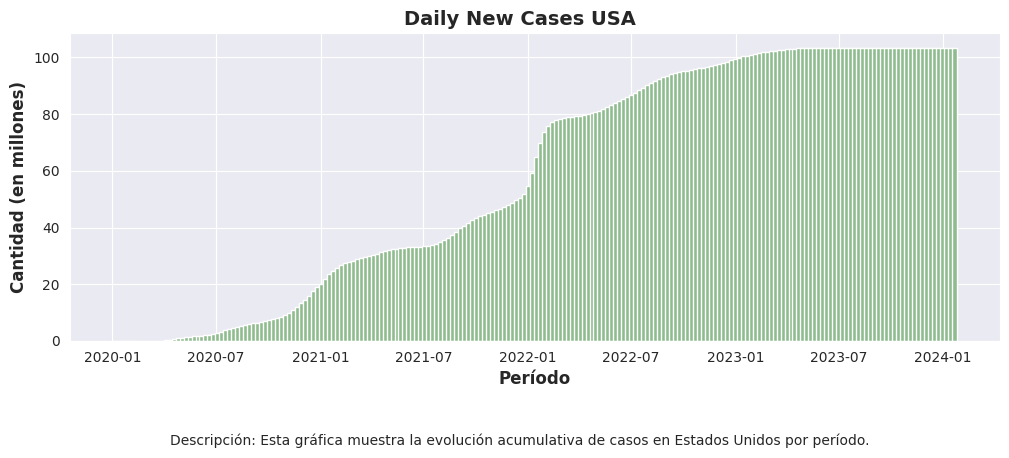

In [ ]:
# Visualización en gráfico de barras
# Crea el gráfico de barras
pais_anotar = "USA"
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(new_cases.index, new_cases.values/ 1e6, color="darkseagreen", width=10)

# Añade una descripción en la parte inferior
plt.figtext(0.5, 0.9, f'Daily New Cases {pais_anotar}', ha="center", fontsize=14, fontweight="bold")

# Añade una descripción en la parte inferior del gráfico
plt.text(0.5, -0.15, 'Descripción: Esta gráfica muestra la evolución acumulativa de casos en Estados Unidos por período.',
         ha="center", fontsize=10, transform=fig.transFigure)

plt.xlabel("Período", fontsize=12, fontweight="bold")
plt.ylabel("Cantidad (en millones)", fontsize=12, fontweight="bold")
ax.plot()

# Muestra el gráfico
plt.show()

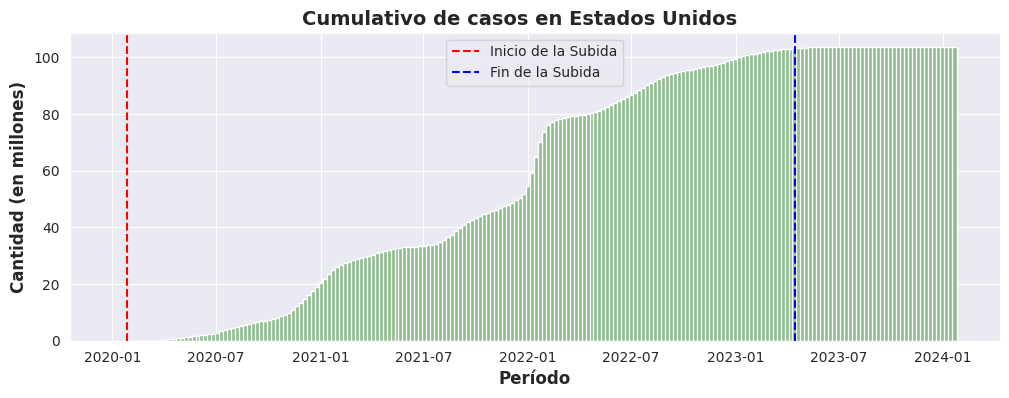

In [ ]:
import matplotlib.pyplot as plt


# Ajusta el umbral de crecimiento relativo según lo que consideres como el inicio y fin de la subida
# Parámetro que determina cuánto tiene que aumentar la serie temporal en relación con el valor anterior
# para considerarlo como un inicio de subida. Es un porcentaje relativo al cambio entre dos puntos consecutivos.
umbral_crecimiento_relativo = 0.001

# Obtener los valores de EEUU
usa_values = grouped_df.loc["USA"]

# Calcular el crecimiento relativo
crecimiento_relativo = usa_values.pct_change()

# Encontrar el primer y último mes de subida
meses_de_subida = crecimiento_relativo[crecimiento_relativo > umbral_crecimiento_relativo].index
primer_mes_subida = meses_de_subida[0]
ultimo_mes_subida = meses_de_subida[-1]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(usa_values.index, usa_values.values / 1e6, color="darkseagreen", width=10)

# Resaltar el inicio y fin de la subida
ax.axvline(x=primer_mes_subida, color='red', linestyle='--', label='Inicio de la Subida')
ax.axvline(x=ultimo_mes_subida, color='blue', linestyle='--', label='Fin de la Subida')

plt.figtext(0.5, 0.9, 'Cumulativo de casos en Estados Unidos', ha="center", fontsize=14, fontweight="bold")
plt.xlabel("Período", fontsize=12, fontweight="bold")
plt.ylabel("Cantidad (en millones)", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

En este caso, umbral_crecimiento_relativo = 0.001 significa que se considerará que la subida comenzó cuando el valor actual sea al menos un 0.1% mayor que el valor anterior.

Ajustar este umbral te permite controlar la sensibilidad de la detección del inicio de la subida. Un umbral más bajo detectará subidas más pequeñas, mientras que un umbral más alto requerirá un aumento más significativo para considerarlo como el inicio de la subida. Como teniamos nuestra imagen anterior fuimos prnamdo el umbral para detectar el inicio y fin de la subida.

### ***Pregunta 3***

**¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?**

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

In [ ]:
#Agrupar por país y fecha
columnas_result = ['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths','lethality_rate']
result = df_covid_limpio[columnas_result].groupby([df_covid_limpio.Date_reported.dt.to_period("M"), df_covid_limpio.Country]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result

New_cases  \
Date_reported Country                                                         
2020-01       Afghanistan                                               0.0   
              Albania                                                   0.0   
              Algeria                                                   0.0   
              American Samoa                                            0.0   
              Andorra                                                   0.0   
...                                                                     ...   
2024-01       Viet Nam                                                  0.0   
              Wallis and Futuna                                         0.0   
              Zambia                                                    0.0   
              Zimbabwe                                                 85.0   
              occupied Palestinian territory, including east ...        0.0   

                                                                  Cumulative_cases  \
Date_reported Country                                                                
2020-01       Afghanistan                                                      0.0   
              Albania                                                          0.0   
              Algeria                                                          0.0   
              American Samoa                                                   0.0   
              Andorra                                                          0.0   
...                                                                            ...   
2024-01       Viet Nam                                                  11624000.0   
              Wallis and Futuna                                             3550.0   
              Zambia                                                      349304.0   
              Zimbabwe                                                    266202.0   
              occupied Palestinian territory, including east ...          703228.0   

                                                                  New_deaths  \
Date_reported Country                                                          
2020-01       Afghanistan                                                0.0   
              Albania                                                    0.0   
              Algeria                                                    0.0   
              American Samoa                                             0.0   
              Andorra                                                    0.0   
...                                                                      ...   
2024-01       Viet Nam                                                   0.0   
              Wallis and Futuna                                          0.0   
              Zambia                                                     0.0   
              Zimbabwe                                                   3.0   
              occupied Palestinian territory, including east ...         0.0   

                                                                  Cumulative_deaths  \
Date_reported Country                                                                 
2020-01       Afghanistan                                                       0.0   
              Albania                                                           0.0   
              Algeria                                                           0.0   
              American Samoa                                                    0.0   
              Andorra                                                           0.0   
...                                                                             ...   
2024-01       Viet Nam                                                      43206.0   
              Wallis and Futuna                                                 8.0   
        

In [ ]:
#Reiniciar los índices
#No se indicó drop=True para que los valores del mes y el país se guarden en el dataframe
result = result.reset_index()
result.rename(columns={"Date_reported":"Month_reported"}, inplace=True)
result

,Month_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01,Afghanistan,0.0,0.0,0.0,0.0,0.000000
1,2020-01,Albania,0.0,0.0,0.0,0.0,0.000000
2,2020-01,Algeria,0.0,0.0,0.0,0.0,0.000000
3,2020-01,American Samoa,0.0,0.0,0.0,0.0,0.000000
4,2020-01,Andorra,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
11322,2024-01,Viet Nam,0.0,11624000.0,0.0,43206.0,0.371696
11323,2024-01,Wallis and Futuna,0.0,3550.0,0.0,8.0,0.225352
11324,2024-01,Zambia,0.0,349304.0,0.0,4069.0,1.164888
11325,2024-01,Zimbabwe,85.0,266202.0,3.0,5737.0,2.155130


In [ ]:
#Agrupar por país y obtener el promedio
top_4_paises = pd.DataFrame(result.groupby('Country').mean()).reset_index()
top_4_paises

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,Afghanistan,930.836735,136220.244898,34.877551,5411.755102,3.758708
1,Albania,1318.265306,195451.081633,15.061224,2443.408163,1.686023
2,Algeria,984.326531,181184.367347,30.183673,4785.408163,3.155017
3,American Samoa,50.734694,3622.612245,0.183673,14.897959,0.189916
4,Andorra,214.000000,26628.000000,0.897959,119.632653,1.244833
...,...,...,...,...,...,...
228,Wallis and Futuna,2.122449,1263.142857,0.163265,4.877551,0.595147
229,Yemen,0.000000,0.000000,0.000000,0.000000,0.000000
230,Zambia,1610.918367,207066.489796,20.653061,2668.877551,1.648125
231,Zimbabwe,862.083333,153967.875000,21.000000,3642.979167,2.735412


In [ ]:
#Obtener los países con mayor índice de letalidad
top_4_paises = top_4_paises.sort_values('lethality_rate', ascending=False).head(4)
top_4_paises

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
199,Sudan,229.551020,4.267427e+04,26.897959,3250.306122,7.013145
161,Peru,18593.152174,2.806907e+06,873.500000,171758.869565,6.954711
134,Mexico,30410.911111,4.675821e+06,1214.666667,257795.155556,6.401469
203,Syrian Arab Republic,250.755102,3.616398e+04,14.081633,2083.530612,5.557313


In [ ]:
top_4_paises = top_4_paises['Country']
top_4_paises

199                   Sudan
161                    Peru
134                  Mexico
203    Syrian Arab Republic
Name: Country, dtype: object

In [ ]:
#Filtrar el dataframe result por los países en top_4_paises
result = result[result.Country.isin(top_4_paises.to_list())]
result.reset_index(drop=True, inplace=True)
result

,Month_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01,Mexico,0.0,0.0,0.0,0.0,0.000000
1,2020-01,Peru,0.0,0.0,0.0,0.0,0.000000
2,2020-01,Sudan,0.0,0.0,0.0,0.0,0.000000
3,2020-01,Syrian Arab Republic,0.0,0.0,0.0,0.0,0.000000
4,2020-02,Mexico,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
184,2023-12,Syrian Arab Republic,0.0,57423.0,0.0,3163.0,5.508246
185,2024-01,Mexico,0.0,7702809.0,0.0,334958.0,4.348518
186,2024-01,Peru,0.0,4536733.0,0.0,221583.0,4.884198
187,2024-01,Sudan,0.0,63993.0,0.0,5046.0,7.885237


In [ ]:
#Obtener información del país a consultar
result_pais = df_covid_limpio[df_covid_limpio['Country'] == 'USA'].groupby(df_covid_limpio.Date_reported.dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais.rename(columns={"Date_reported":"Month_reported"}, inplace=True)
result_pais.Month_reported = result_pais.Month_reported.dt.to_period("M")
result_pais.reset_index(drop=True, inplace=True)
result_pais.drop(['Country_code'], axis=1, inplace=True)
result_pais.head()

,Month_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01,USA,0,0,0,0,0.000000
1,2020-02,USA,2,9,0,0,0.000000
2,2020-03,USA,391,464,18,19,4.094828
3,2020-04,USA,205165,922947,14899,53434,5.789498
4,2020-05,USA,182246,1303629,12758,79827,6.123445


In [ ]:
#Combinar los dos dataframe
result_final = pd.concat([result, result_pais])
result_final.sort_values(by=["Month_reported","Country"], inplace=True)
result_final.reset_index(drop=True, inplace=True)
result_final

,Month_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01,Mexico,0.0,0.0,0.0,0.0,0.000000
1,2020-01,Peru,0.0,0.0,0.0,0.0,0.000000
2,2020-01,Sudan,0.0,0.0,0.0,0.0,0.000000
3,2020-01,Syrian Arab Republic,0.0,0.0,0.0,0.0,0.000000
4,2020-01,USA,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
233,2024-01,Mexico,0.0,7702809.0,0.0,334958.0,4.348518
234,2024-01,Peru,0.0,4536733.0,0.0,221583.0,4.884198
235,2024-01,Sudan,0.0,63993.0,0.0,5046.0,7.885237
236,2024-01,Syrian Arab Republic,0.0,57423.0,0.0,3163.0,5.508246


In [ ]:
# Filtrar datos solo para Estados Unidos
us_data = df_covid_limpio[df_covid_limpio['Country'] == 'USA']

# Agrupar por mes y calcular la tasa de letalidad promedio
us_lethality_by_month = us_data.groupby(us_data['Date_reported'].dt.to_period("M")).agg({
    'lethality_rate': 'mean',
    'New_cases': 'sum',
    'Cumulative_cases': 'max',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'max'
}).reset_index()

# Imprimir el DataFrame resultante
us_lethality_by_month

,Date_reported,lethality_rate,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01,0.000000,7,7,0,0
1,2020-02,0.000000,33,40,0,0
2,2020-03,2.015743,126269,126309,2106,2106
3,2020-04,4.597513,796638,922947,51328,53434
4,2020-05,6.024545,862475,1785422,51891,105325
5,2020-06,5.430872,739955,2525377,21893,127218
6,2020-07,4.069036,1668539,4193916,24372,151590
7,2020-08,3.281778,1780555,5974471,36369,187959
8,2020-09,3.018525,1126625,7101096,20634,208593
9,2020-10,2.776766,1469669,8570765,19826,228419


In [ ]:
# Encontrar el mes con la tasa de letalidad más alta para Estados Unidos
mes_max_letalidad = us_lethality_by_month.loc[us_lethality_by_month['lethality_rate'].idxmax()]

# Imprimir el resultado
print("Mes con mayor tasa de letalidad:")
mes_max_letalidad

Mes con mayor tasa de letalidad:


Date_reported         2020-05
lethality_rate       6.024545
New_cases              862475
Cumulative_cases      1785422
New_deaths              51891
Cumulative_deaths      105325
Name: 4, dtype: object

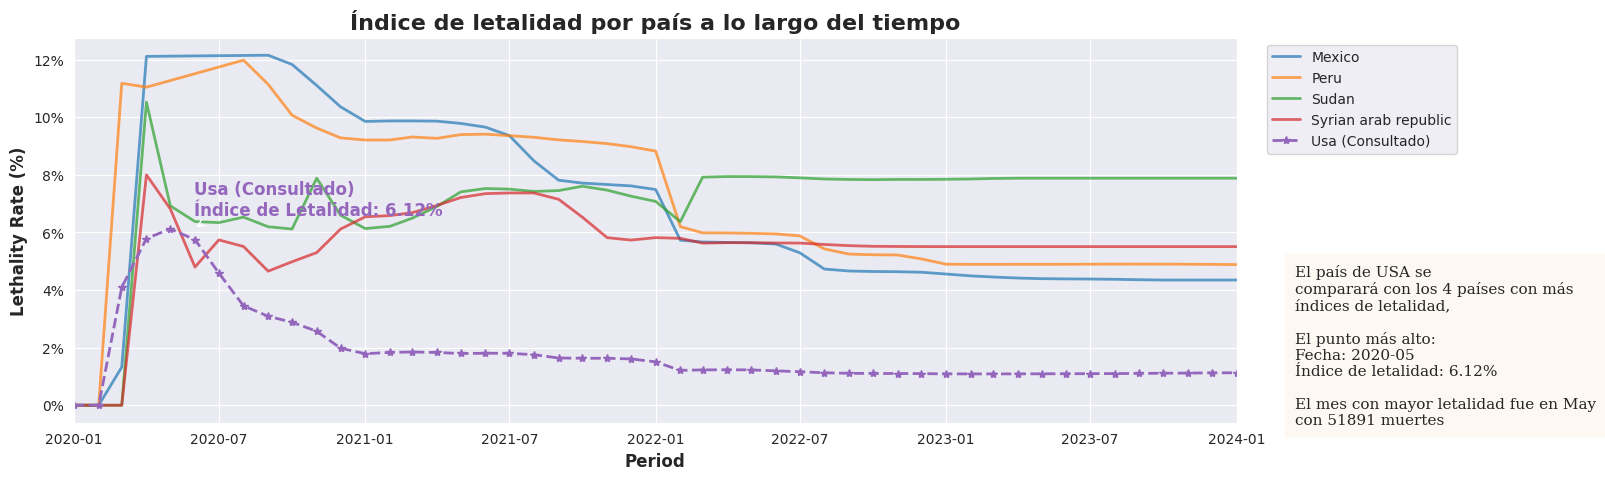

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# País a resaltar
pais_destacado = 'USA'

# Crea el gráfico de líneas
fig, ax = plt.subplots(figsize=(15, 5))

# Almacena las coordenadas del punto más alto para el país destacado
max_lethality_coords = None

for pais in result_final.Country.unique():
    country_data = result_final[result_final['Country'] == pais]

    # Estilo de línea normal
    linestyle = '-'
    marker = ''
    alpha = 0.7

    # Estilo de línea resaltado para el país seleccionado
    if pais == pais_destacado:
        linestyle = '--'
        marker = '*'  # Agregamos un marcador para el país seleccionado
        alpha = 1.0

        # Encuentra el índice del punto más alto
        max_lethality_index = country_data['lethality_rate'].idxmax()
        # Almacena las coordenadas del punto más alto
        max_lethality_coords = (country_data.loc[max_lethality_index, 'Month_reported'],
                                country_data.loc[max_lethality_index, 'lethality_rate'])

    # Etiqueta para el país en la leyenda
    label = pais.capitalize() if pais != pais_destacado else f'{pais.capitalize()} (Consultado)'

    line = plt.plot(country_data['Month_reported'].dt.to_timestamp(), country_data['lethality_rate'],
                    label=label, linestyle=linestyle, marker=marker, alpha=alpha, linewidth=2)[0]  # Guarda la línea

# -------------------------------------------- Ajusta la posición de la leyenda ---------------------------------------------------------
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Añade la descripción
result_pais['lethality_rate_percentage'] = result_pais['lethality_rate'] / 100
max_lethality_index = result_pais['lethality_rate_percentage'].idxmax()
max_lethality_point = result_pais.loc[max_lethality_index]
max_lethality_date = max_lethality_point['Month_reported']
max_lethality_rate = max_lethality_point['lethality_rate_percentage']

# Formatea el eje y para mostrar los porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

plt.text(1.05, 0.2, f'''El país de {pais_destacado} se\ncomparará con los 4 países con más\níndices de letalidad,\n
El punto más alto:\nFecha: {max_lethality_date}\nÍndice de letalidad: {max_lethality_rate:.2%}\n
El mes con mayor letalidad fue en {mes_max_letalidad['Date_reported'].strftime('%B')}\ncon {mes_max_letalidad['New_deaths']} muertes''',
         transform=ax.transAxes, fontsize=11, fontfamily="serif", va='center',
         bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 8})
# -----------------------------------------------------------------------------------------------------------------------------------------

# Añade la etiqueta al país destacado sobre el punto más alto
color_pais_destacado = line.get_color()  # Obtiene el color del país destacado desde la línea
plt.annotate(f'{pais_destacado.capitalize()} (Consultado)\nÍndice de Letalidad: {max_lethality_rate:.2%}',
             xy=(max_lethality_coords[0], max_lethality_coords[1]),
             xytext=(0, 10),  # Ajusta las coordenadas para mover la etiqueta dentro del gráfico
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             color=color_pais_destacado,  # Establece el color de la etiqueta
             fontsize=12,  # Tamaño de la fuente de la etiqueta
             fontweight='bold'  # Grosor de la fuente
             )

# Agrega un título al gráfico en negrita y más grande
plt.title('Índice de letalidad por país a lo largo del tiempo', fontsize=16, fontweight='bold')

plt.xlabel("Period", fontsize=12, fontweight="bold")
plt.ylabel("Lethality Rate (%)", fontsize=12, fontweight="bold")

# Establece límites en el eje x para evitar que la etiqueta quede fuera del gráfico
plt.xlim(result_pais['Month_reported'].dt.to_timestamp().iloc[0], result_pais['Month_reported'].dt.to_timestamp().iloc[-1])

# Muestra el gráfico
plt.show()

### ***Pregunta 4***

**Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?**

In [ ]:
# Filtra los registros hasta '2020-12-31'
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']

# Imprime o muestra el nuevo DataFrame
df_filtrado.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [ ]:
# Agrupa por el nombre del país y calcula el índice de letalidad promedio
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'])['lethality_rate'].mean().reset_index()

# Imprime o muestra el nuevo DataFrame agrupado
df_agrupado.head()

,Country_code,Country,lethality_rate
0,AD,Andorra,3.097271
1,AE,United Arab Emirates,0.450758
2,AF,Afghanistan,2.462106
3,AG,Antigua and Barbuda,3.734753
4,AI,Anguilla,0.000000


In [ ]:
# Realiza el inner join entre df_agrupado y df_population_limpio
df_final = pd.merge(df_agrupado, df_population_limpio, how='inner', on='Country_code')

# Imprime o muestra el nuevo DataFrame resultante
df_final.head()

,Country_code,Country,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,AD,Andorra,3.097271,76343.0,38842.0,37502.0,162.432,83.004
1,AE,United Arab Emirates,0.450758,9211657.0,6443813.0,2767844.0,129.698,79.726
2,AF,Afghanistan,2.462106,37769499.0,19090409.0,18679089.0,58.170,63.565
3,AG,Antigua and Barbuda,3.734753,92117.0,43961.0,48156.0,209.356,78.691
4,AI,Anguilla,0.000000,15380.0,7551.0,7828.0,174.767,76.882


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        231 non-null    object 
 1   Country             231 non-null    object 
 2   lethality_rate      231 non-null    float64
 3   Total_Population    231 non-null    float64
 4   Male_Population     231 non-null    float64
 5   Female_Population   231 non-null    float64
 6   Population_Density  231 non-null    float64
 7   Life_Expectancy     231 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.2+ KB


In [ ]:
# Selecciona las columnas numéricas especificadas
columnas_numericas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_numericas]

# Imprime o muestra el DataFrame resultante
df_final

,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,3.097271,76343.0,38842.0,37502.0,162.432,83.004
1,0.450758,9211657.0,6443813.0,2767844.0,129.698,79.726
2,2.462106,37769499.0,19090409.0,18679089.0,58.170,63.565
3,3.734753,92117.0,43961.0,48156.0,209.356,78.691
4,0.000000,15380.0,7551.0,7828.0,174.767,76.882
...,...,...,...,...,...,...
226,0.000000,31546691.0,15953578.0,15593113.0,59.751,65.092
227,0.872976,294489.0,139735.0,154754.0,785.304,77.153
228,1.899765,58087055.0,28207948.0,29879107.0,47.581,66.175
229,2.055205,18380477.0,9066397.0,9314079.0,24.725,62.793


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Selecciona las características (X) y la variable objetivo (y)
X = df_final.drop('lethality_rate', axis=1)  # Características
y = df_final['lethality_rate']  # Variable objetivo o target

# Inicializa el modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Ajusta el modelo a los datos
modelo_rf.fit(X, y)

# Obtiene la importancia de las características
feature_importances = modelo_rf.feature_importances_

# Crea un DataFrame con las características y sus importancias
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordena el DataFrame por importancia en orden descendente
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprime o muestra el DataFrame resultante
importances_df

,Feature,Importance
4,Life_Expectancy,0.304267
3,Population_Density,0.232313
2,Female_Population,0.203579
1,Male_Population,0.134939
0,Total_Population,0.124903


In [ ]:
# Supongamos que tu DataFrame se llama df_importances
importance_life_expectancy = importances_df.loc[4, 'Importance']

f'El valor de "Life_Expectancy" es: {importance_life_expectancy*100}'

'El valor de "Life_Expectancy" es: 30.426694904052358'

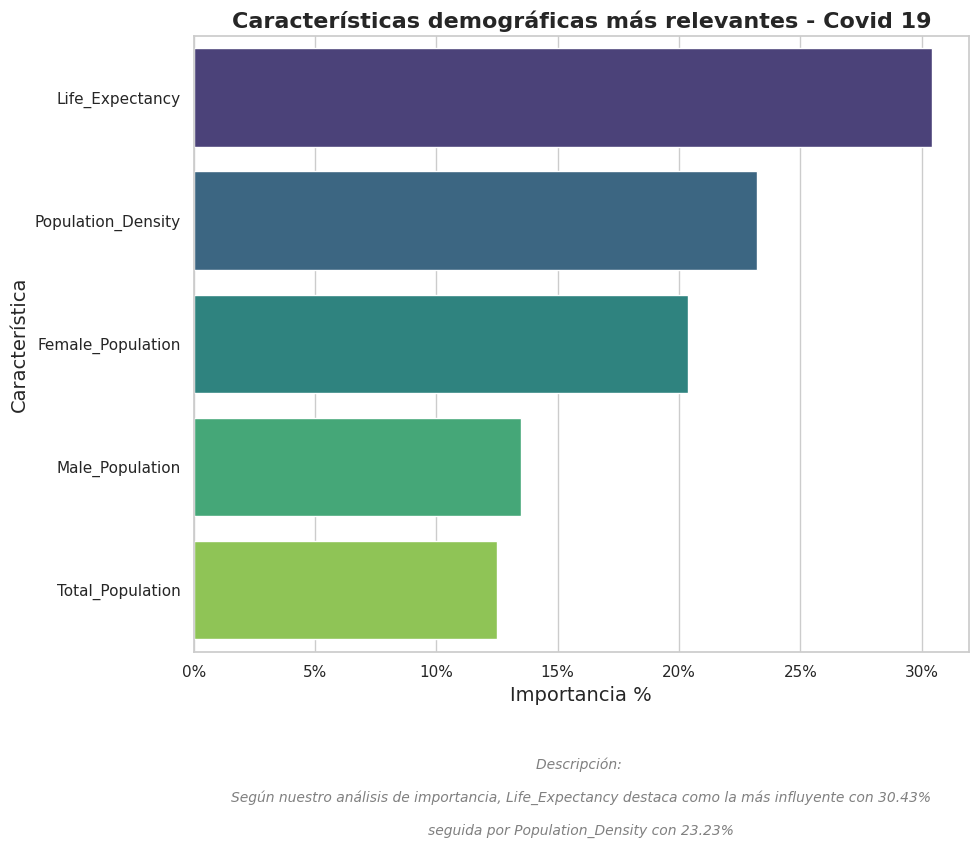

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Multiplica las importancias por 100 y redondea a un solo dígito decimal
importances_df['Importance (%)'] = (importances_df['Importance'] * 100)

# Crea un gráfico de barras horizontales con las importancias de las características
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')

# Personaliza el gráfico
plt.title('Características demográficas más relevantes - Covid 19', fontsize=16, fontweight='bold')
plt.xlabel('Importancia %', fontsize=14)
plt.ylabel('Característica', fontsize=14)

# Ajusta el eje x para mostrar los porcentajes
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))  # Usa 1 como máximo para mostrar el porcentaje

# Supongamos que tienes los valores importance_life_expectancy y importance_population_density del DataFrame importances_df
importance_life_expectancy = importances_df.loc[4, 'Importance']
importance_population_density = importances_df.loc[3, 'Importance']

# Redondea el valor a dos decimales y conviértelo a porcentaje
rounded_importance_percentage = round(importance_life_expectancy * 100, 2)
rounded_importance_population_density = round(importance_population_density * 100, 2)

# Agrega una descripción en un cuadro con más espacio vertical
desc_box = dict(boxstyle='round', facecolor='white', alpha=0.7, pad=0.5)  # Ajusta el valor de 'pad'
plt.text(0.5, -0.25, f'''Descripción: \n\nSegún nuestro análisis de importancia, {importances_df.Feature[4]} destaca como la más influyente con {rounded_importance_percentage}%
\nseguida por {importances_df.Feature[3]} con {rounded_importance_population_density}%\n''',
                     horizontalalignment='center', ha='center', color='gray',verticalalignment='center', transform=ax.transAxes, fontsize=10, fontstyle='italic', bbox=desc_box)


plt.show()

In [ ]:
len(feature_importances)

5

In [ ]:
len(df_final.columns)

6

In [ ]:
modelo_rf.feature_importances_

array([0.12490296, 0.13493855, 0.20357899, 0.23231255, 0.30426695])

In [ ]:
df_final.columns

Index(['lethality_rate', 'Total_Population', 'Male_Population',
       'Female_Population', 'Population_Density', 'Life_Expectancy'],
      dtype='object')

In [ ]:
df_final = df_final.drop('lethality_rate', axis=1)

In [ ]:
import plotly.express as px

# Crea un DataFrame con las importancias de las características
importances_df2 = pd.DataFrame({'Feature': df_final.columns, 'Importance': feature_importances * 100})

# Redondea la columna de importancias a 6 decimales
importances_df2['Importance'] = importances_df2['Importance'].round(4)

# Redondea el valor medio de la escala de colores
color_continuous_midpoint = importances_df2['Importance'].median().round(6)

# Crea un gráfico de barras horizontales con Plotly Express y asigna colores
fig = px.bar(importances_df2, y='Importance', x='Feature', text='Importance',
             labels={'Importance': 'Importancia (%)', 'Feature': 'Característica'},
             title='Importancia de las Características en el Índice de Letalidad',
             color='Importance',  # Asigna el color según la importancia
             color_continuous_scale='Viridis', color_continuous_midpoint=color_continuous_midpoint)

# Personaliza el diseño del gráfico
fig.update_layout(xaxis=dict(categoryorder='total ascending'), yaxis_title='Importancia (%)',
                  xaxis_title='Característica', showlegend=False,
                  height=500,  # Ajusta el alto de la gráfica
                  width=1000)   # Ajusta el ancho de la gráfica

# Guardar el gráfico como una imagen
fig.write_image("Importancia_de_las_Características.png")

# Muestra el gráfico
fig.show()

### ***Pregunta 5***

**¿Existe otro insight que puedas proporcionar?**

**5. Análisis de la Velocidad de Propagación del COVID-19: Comparativa Mensual en Países Destacados**

In [ ]:
result_final.head()

,Month_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01,Mexico,0.0,0.0,0.0,0.0,0.0
1,2020-01,Peru,0.0,0.0,0.0,0.0,0.0
2,2020-01,Sudan,0.0,0.0,0.0,0.0,0.0
3,2020-01,Syrian Arab Republic,0.0,0.0,0.0,0.0,0.0
4,2020-01,USA,0.0,0.0,0.0,0.0,0.0


In [ ]:
us_lethality_by_month

,Date_reported,lethality_rate,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01,0.000000,7,7,0,0
1,2020-02,0.000000,33,40,0,0
2,2020-03,2.015743,126269,126309,2106,2106
3,2020-04,4.597513,796638,922947,51328,53434
4,2020-05,6.024545,862475,1785422,51891,105325
5,2020-06,5.430872,739955,2525377,21893,127218
6,2020-07,4.069036,1668539,4193916,24372,151590
7,2020-08,3.281778,1780555,5974471,36369,187959
8,2020-09,3.018525,1126625,7101096,20634,208593
9,2020-10,2.776766,1469669,8570765,19826,228419


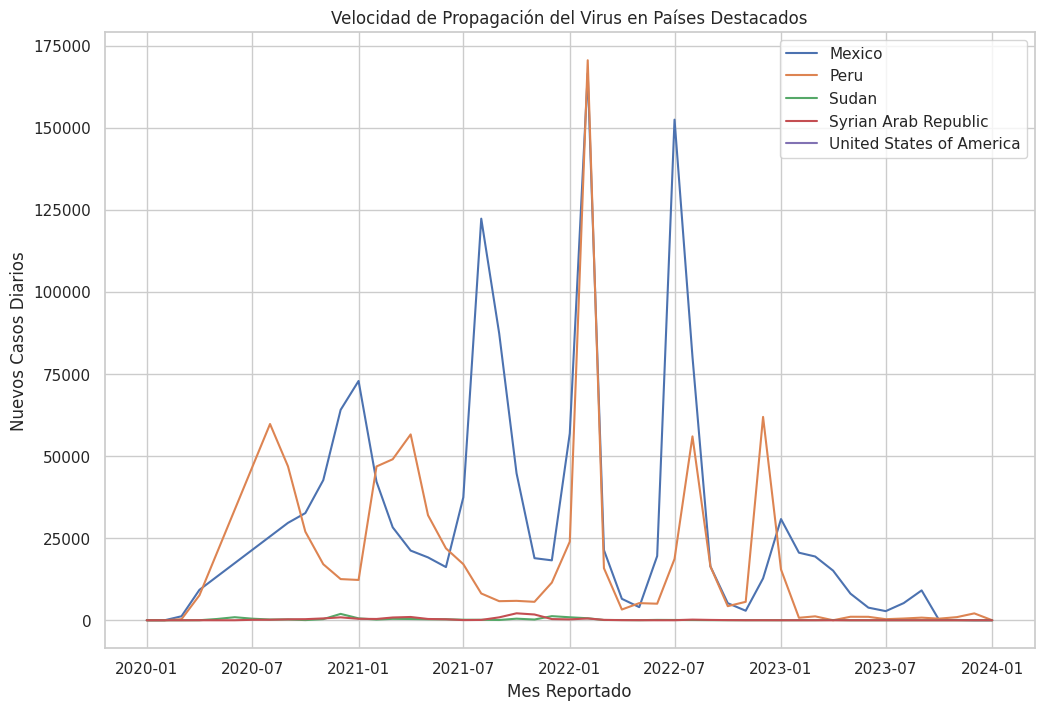

In [ ]:
import matplotlib.pyplot as plt

# Convertir 'Month_reported' a formato numérico
result_final['Numeric_month'] = result_final['Month_reported'].dt.to_timestamp()

# Filtra los datos para incluir solo los países destacados
paises_destacados = ['Mexico', 'Peru', 'Sudan', 'Syrian Arab Republic', 'United States of America']
datos_destacados = result_final[result_final['Country'].isin(paises_destacados)]

# Crea un gráfico de líneas para cada país
fig, ax = plt.subplots(figsize=(12, 8))

for pais in paises_destacados:
    datos_pais = datos_destacados[datos_destacados['Country'] == pais]
    ax.plot(datos_pais['Numeric_month'], datos_pais['New_cases'], label=pais)

# Añade etiquetas y leyenda
ax.set_xlabel('Mes Reportado')
ax.set_ylabel('Nuevos Casos Diarios')
ax.set_title('Velocidad de Propagación del Virus en Países Destacados')
ax.legend()

# Muestra el gráfico
plt.show()



"La visualización muestra la evolución mensual de los nuevos casos diarios de COVID-19 en países destacados, incluyendo México, Perú, Sudán, la República Árabe Siria y los Estados Unidos de América. Cada línea representa un país específico, y la posición vertical de la línea en un mes dado indica la cantidad de nuevos casos diarios reportados en ese momento. Observamos las tendencias y comparativas en la velocidad de propagación del virus a lo largo del tiempo en estos países seleccionados, proporcionando una visión detallada de cómo la situación ha evolucionado en cada región."

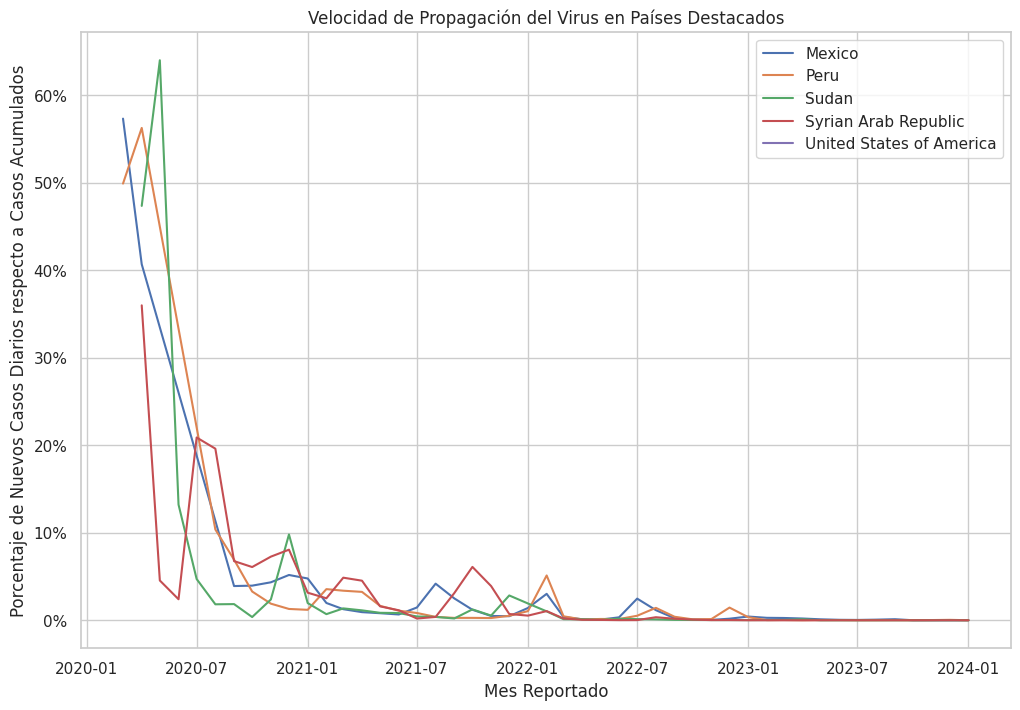

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Convertir 'Month_reported' a formato numérico
result_final['Numeric_month'] = result_final['Month_reported'].dt.to_timestamp()

# Filtra los datos para incluir solo los países destacados
paises_destacados = ['Mexico', 'Peru', 'Sudan', 'Syrian Arab Republic', 'United States of America']
datos_destacados = result_final[result_final['Country'].isin(paises_destacados)]

# Crea un gráfico de líneas para cada país
fig, ax = plt.subplots(figsize=(12, 8))

for pais in paises_destacados:
    datos_pais = datos_destacados[datos_destacados['Country'] == pais]
    # Calcula el porcentaje de nuevos casos en relación con el total de casos acumulados
    porcentaje_nuevos_casos = datos_pais['New_cases'] / datos_pais['Cumulative_cases'] * 100
    ax.plot(datos_pais['Numeric_month'], porcentaje_nuevos_casos, label=pais)

# Añade etiquetas y leyenda
ax.set_xlabel('Mes Reportado')
ax.set_ylabel('Porcentaje de Nuevos Casos Diarios respecto a Casos Acumulados')
ax.set_title('Velocidad de Propagación del Virus en Países Destacados')
ax.legend()

# Formatea el eje y para mostrar los porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Muestra el gráfico
plt.show()


Este gráfico proporciona una representación visual de cómo el porcentaje de nuevos casos diarios en relación con el total de casos acumulados ha variado a lo largo del tiempo para los países seleccionados.

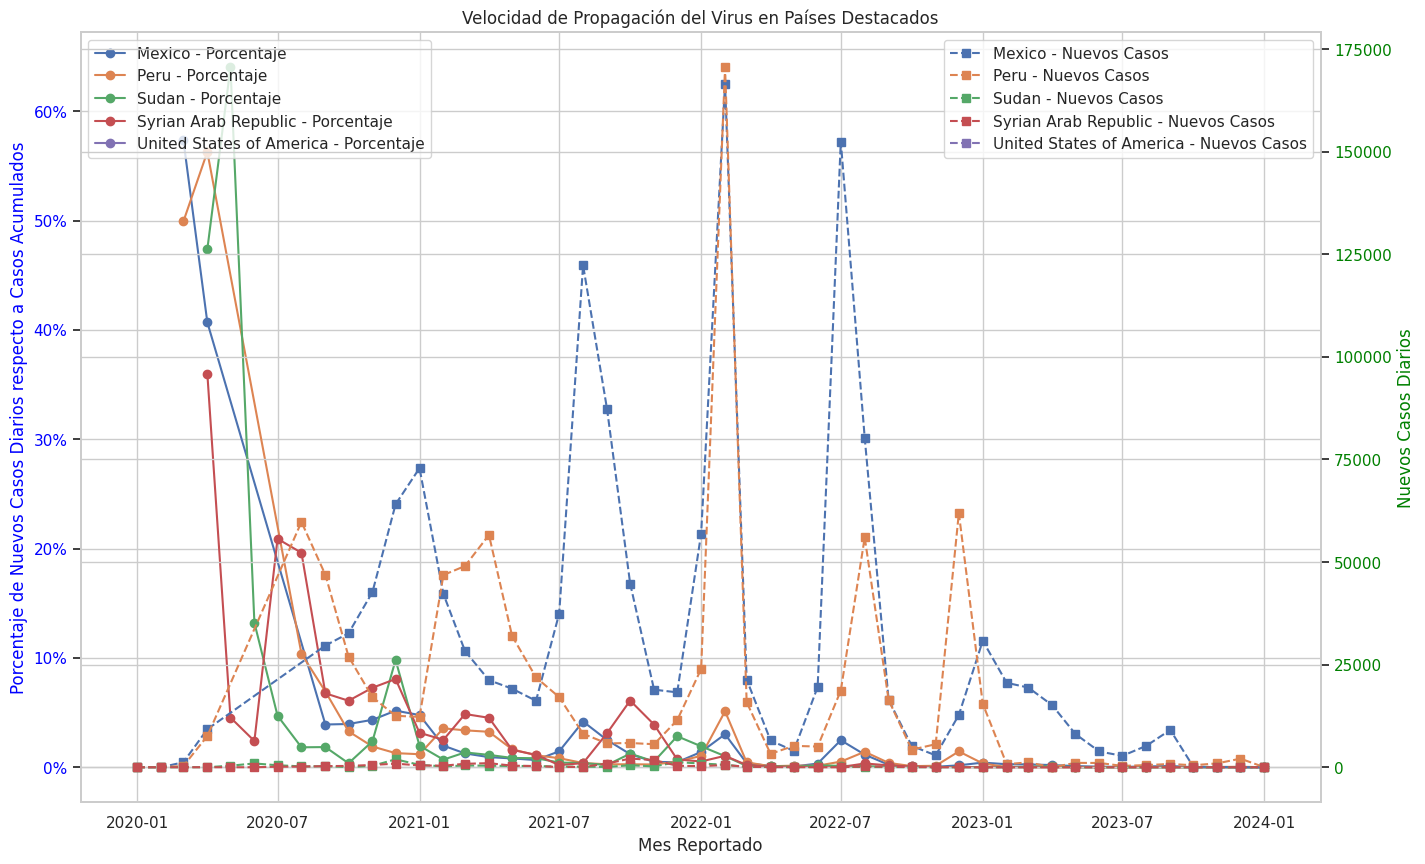

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Convertir 'Month_reported' a formato numérico
result_final['Numeric_month'] = result_final['Month_reported'].dt.to_timestamp()

# Filtrar los datos para incluir solo los países destacados
paises_destacados = ['Mexico', 'Peru', 'Sudan', 'Syrian Arab Republic', 'United States of America']
datos_destacados = result_final[result_final['Country'].isin(paises_destacados)]

# Crear un gráfico de líneas para cada país
fig, ax = plt.subplots(figsize=(16, 10))

# Crear un segundo eje y
ax2 = ax.twinx()

for pais in paises_destacados:
    datos_pais = datos_destacados[datos_destacados['Country'] == pais]

    # Calcular el porcentaje de nuevos casos en relación con el total de casos acumulados
    porcentaje_nuevos_casos = datos_pais['New_cases'] / datos_pais['Cumulative_cases'] * 100

    # Graficar el porcentaje en el primer eje y
    ax.plot(datos_pais['Numeric_month'], porcentaje_nuevos_casos, label=f'{pais} - Porcentaje', linestyle='-', marker='o')

    # Graficar las cantidades absolutas de nuevos casos en el segundo eje y
    ax2.plot(datos_pais['Numeric_month'], datos_pais['New_cases'], label=f'{pais} - Nuevos Casos', linestyle='--', marker='s')

# Añadir etiquetas y leyenda al primer eje y
ax.set_xlabel('Mes Reportado')
ax.set_ylabel('Porcentaje de Nuevos Casos Diarios respecto a Casos Acumulados', color='blue')
ax.set_title('Velocidad de Propagación del Virus en Países Destacados')
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor='blue')

# Formatear el eje y del primer eje para mostrar los porcentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Ajustar las propiedades del segundo eje y
ax2.set_ylabel('Nuevos Casos Diarios', color='green')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='green')

# Mostrar el gráfico
plt.show()


Este gráfico proporciona una representación visual de la velocidad de propagación del virus para los países seleccionados, mostrando tanto el porcentaje de nuevos casos diarios en relación con los casos acumulados como las cantidades absolutas de nuevos casos.

### **Pregunta 6**

**6. comparativa de los casos y las muertes acumulativas en los 20 países principales.**

In [ ]:
# Creación de visualización para dataset mundial
worldometer_df_sum = df_covid_copia.groupby(by = 'Country').sum()
worldometer_df_sum

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
Country,,,,,
Afghanistan,231063,28790023,7975,1137678,777.387584
Albania,334818,41711745,3605,519319,338.363561
Algeria,270005,38527306,6595,1013494,596.189948
American Samoa,8359,757981,34,3107,39.264093
Andorra,48015,5702013,159,25374,245.509472
...,...,...,...,...,...
Wallis and Futuna,3550,274500,8,1007,118.365849
Yemen,1,3,0,0,0.000000
Zambia,349304,43888112,4069,561873,317.802118


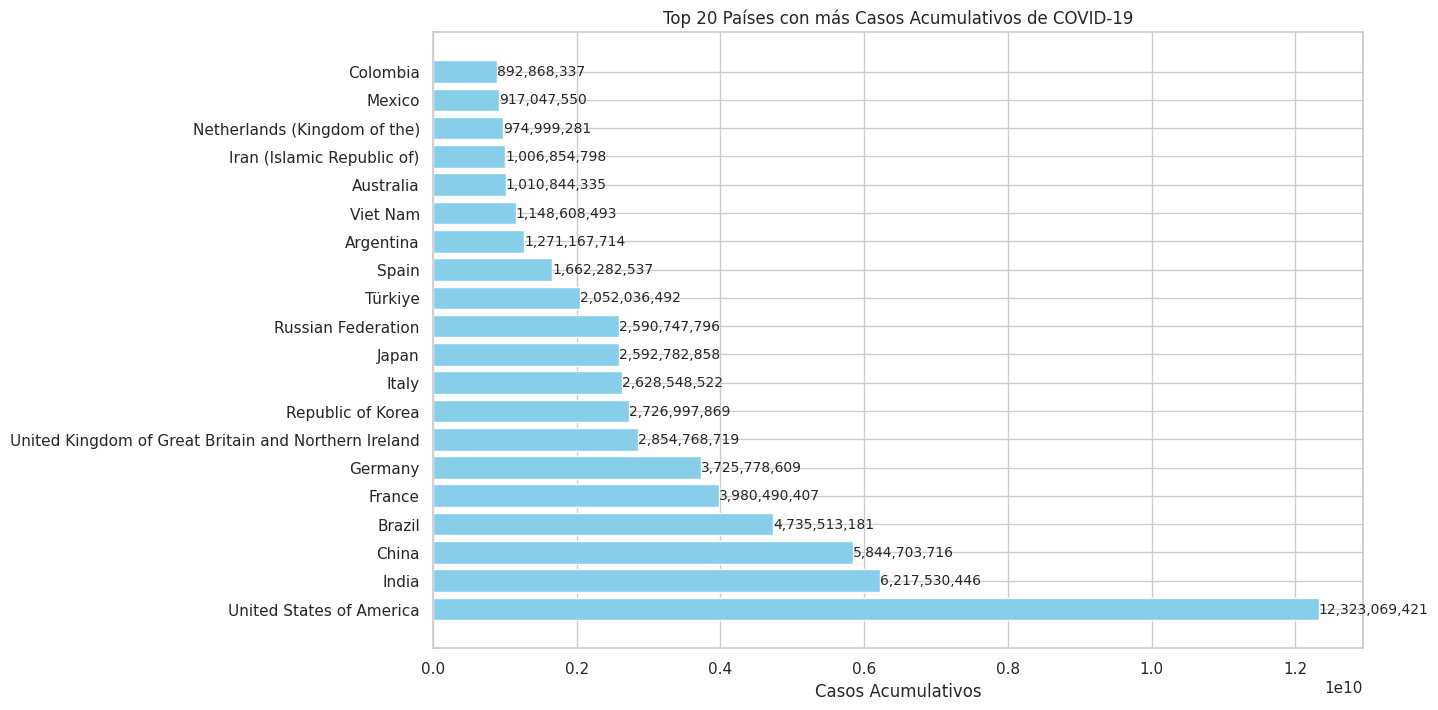

In [ ]:
N = 20
# Ordenar los países por casos acumulativos
worldometer_df_sum_sorted = worldometer_df_sum['Cumulative_cases'].sort_values(ascending=False)
top_countries_20 = worldometer_df_sum_sorted.head(N)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_countries_20.index, top_countries_20, color='skyblue')
plt.xlabel('Casos Acumulativos')
plt.title(f'Top {N} Países con más Casos Acumulativos de COVID-19')

# Añadir etiquetas a cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)

plt.show()


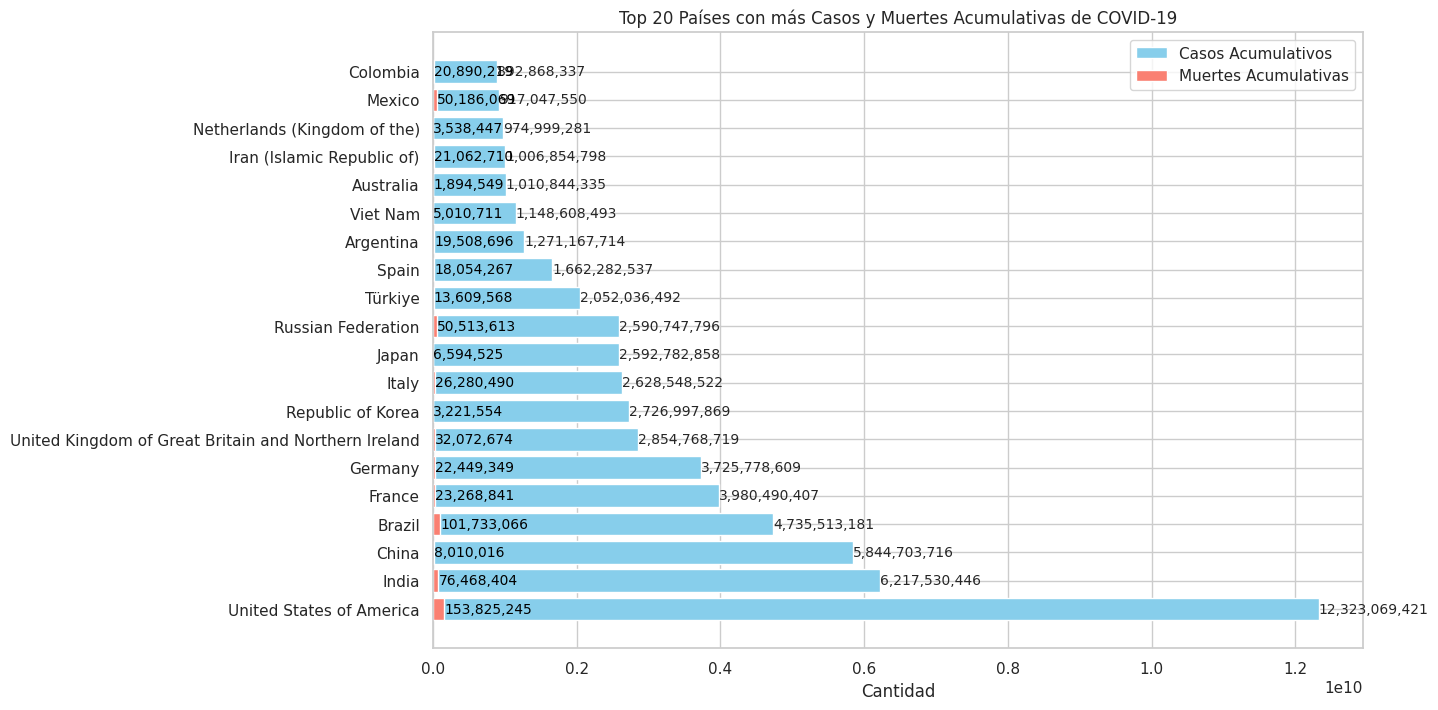

In [ ]:
N = 20  # Puedes ajustar este valor según lo que desees mostrar

# Ordenar los países por casos acumulativos
worldometer_df_sum_sorted_cases = worldometer_df_sum['Cumulative_cases'].sort_values(ascending=False)
top_countries_20_cases = worldometer_df_sum_sorted_cases.head(N)

# Ordenar los países por muertes acumulativas
worldometer_df_sum_sorted_deaths = worldometer_df_sum['Cumulative_deaths'].sort_values(ascending=False)
top_countries_20_deaths = worldometer_df_sum_sorted_deaths.loc[top_countries_20_cases.index]

plt.figure(figsize=(12, 8))

# Crear barras para casos acumulativos
bars_cases = plt.barh(top_countries_20_cases.index, top_countries_20_cases, color='skyblue', label='Casos Acumulativos')

# Crear barras para muertes acumulativas
bars_deaths = plt.barh(top_countries_20_deaths.index, top_countries_20_deaths, color='salmon', label='Muertes Acumulativas')

plt.xlabel('Cantidad')
plt.title(f'Top {N} Países con más Casos y Muertes Acumulativas de COVID-19')
plt.legend()

# Añadir etiquetas a cada barra de casos acumulativos
for bar in bars_cases:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)

# Añadir etiquetas a cada barra de muertes acumulativas
for bar in bars_deaths:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()



Este gráfico proporciona una visión rápida y comparativa de los casos y las muertes acumulativas en los 20 países principales.

In [ ]:
# Total de  Muertes en cada pais de los 20 principales
top_countries_20_deaths

Country
United States of America                                153825245
India                                                    76468404
China                                                     8010016
Brazil                                                  101733066
France                                                   23268841
Germany                                                  22449349
United Kingdom of Great Britain and Northern Ireland     32072674
Republic of Korea                                         3221554
Italy                                                    26280490
Japan                                                     6594525
Russian Federation                                       50513613
Türkiye                                                  13609568
Spain                                                    18054267
Argentina                                                19508696
Viet Nam                                                  5010711
Au